In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
def check_df(dataframe, head=5):
    print("################ Shape #####################")
    print(dataframe.shape)
    print("################ Types #####################")
    print(dataframe.dtypes)
    print("################ Head ######################")
    print(dataframe.head(head))
    print("################ Tail ######################")
    print(dataframe.tail(head))
    print("################ NA ########################")
    print(dataframe.isnull().sum())
    print("################ Describe ##################")
    print(dataframe.describe().T)
check_df(df)

################ Shape #####################
(10000, 14)
################ Types #####################
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
################ Head ######################
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Bal

In [5]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

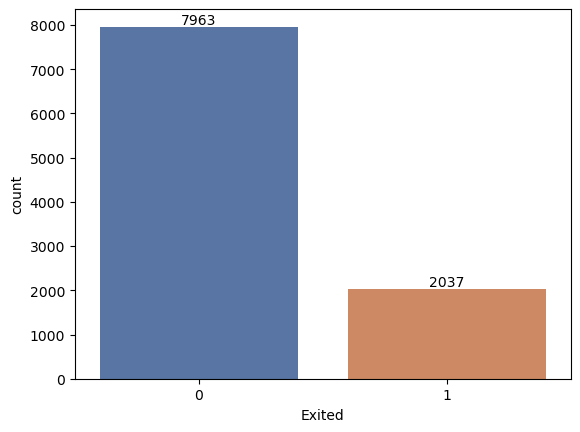

In [6]:
# Target Variable Class Counts

class_counts = df["Exited"].value_counts()             
ax = sns.countplot(x="Exited", data=df, palette="deep") 
for i, count in enumerate(class_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

In [7]:
def print_unique_col_values(df):
       for column in df:
            #if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

RowNumber: [    1     2     3 ...  9998  9999 10000]
CustomerId: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 7

In [8]:
#Age Level                                      
df.loc[(df['Age'] >= 18) & (df['Age'] <= 30), 'new_age'] = '18-30'
df.loc[(df['Age'] >= 31) & (df['Age'] <= 40), 'new_age'] = '31-40'
df.loc[(df['Age'] >= 41) & (df['Age'] <= 50), 'new_age'] = '41-50'
df.loc[(df['Age'] >= 51) & (df['Age'] <= 60), 'new_age'] = '51-60'
df.loc[(df['Age'] >= 61) & (df['Age'] <= 70), 'new_age'] = '61-70'
df.loc[(df['Age'] >= 71) & (df['Age'] <= 80), 'new_age'] = '71-80'
df.loc[(df['Age'] >= 81) & (df['Age'] <= 90), 'new_age'] = '81-90'
df.loc[(df['Age'] >= 91), 'new_age'] = '91_and_over'

In [9]:
# Label Encoding for Categoric Variables

categories = ['Geography', 'Gender','new_age']

label_encoder = LabelEncoder()


for col in categories:
    df[col] = label_encoder.fit_transform(df[col])

In [10]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_age
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,2
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2


In [11]:
del_cols =["RowNumber", "CustomerId", "Surname"]
df = df.drop(del_cols, axis=1)

In [32]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_age
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,2
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,2
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,1
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,2


In [14]:
#Scaling 

cols_to_scale = ['Balance','EstimatedSalary']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [15]:
# Train-Test Split

X = df.drop('Exited',axis='columns')
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [16]:
X_train.shape

(8000, 11)

In [18]:
!pip install imbalanced-learn

In [21]:
# Dealing with imbalanced class problem 
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)

print(y_train.value_counts())

Exited
0    6368
1    6368
Name: count, dtype: int64


In [28]:
# Build a model (ANN) in tensorflow/keras

import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(7, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\Hilal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4186 - loss: 1.3146
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6227 - loss: 0.6743
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6976 - loss: 0.5861
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7131 - loss: 0.5692
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7132 - loss: 0.5734
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7384 - loss: 0.5361
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7301 - loss: 0.5433
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7274 - loss: 0.5655
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7226 - loss: 0.5609
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7421 - loss: 0.5335
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7351 - loss: 0.5516
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [29]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7743 - loss: 0.4813


[0.4787730872631073, 0.781000018119812]

In [30]:
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.09719813],
       [0.12394854],
       [0.22392954],
       [0.11250184],
       [0.19668762]], dtype=float32)

In [31]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [32]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1595
           1       0.45      0.40      0.43       405

    accuracy                           0.78      2000
   macro avg       0.65      0.64      0.64      2000
weighted avg       0.77      0.78      0.78      2000

